# HMS - Harmful Brain Activity Classification

The goal of this competition is to detect and classify seizures and other types of harmful brain activity in electroencephalography (EEG) data. Even experts find this to be a challenging task and often disagree about the correct labels.

In [1]:
'''
Load the Libaries
'''

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

In [7]:
# Load the Data

df = pd.read_csv("train.csv")
df.head()

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
0,1628180742,0,0.0,353733,0,0.0,127492639,42516,Seizure,3,0,0,0,0,0
1,1628180742,1,6.0,353733,1,6.0,3887563113,42516,Seizure,3,0,0,0,0,0
2,1628180742,2,8.0,353733,2,8.0,1142670488,42516,Seizure,3,0,0,0,0,0
3,1628180742,3,18.0,353733,3,18.0,2718991173,42516,Seizure,3,0,0,0,0,0
4,1628180742,4,24.0,353733,4,24.0,3080632009,42516,Seizure,3,0,0,0,0,0


In [8]:
df.dtypes

eeg_id                                int64
eeg_sub_id                            int64
eeg_label_offset_seconds            float64
spectrogram_id                        int64
spectrogram_sub_id                    int64
spectrogram_label_offset_seconds    float64
label_id                              int64
patient_id                            int64
expert_consensus                     object
seizure_vote                          int64
lpd_vote                              int64
gpd_vote                              int64
lrda_vote                             int64
grda_vote                             int64
other_vote                            int64
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106800 entries, 0 to 106799
Data columns (total 15 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   eeg_id                            106800 non-null  int64  
 1   eeg_sub_id                        106800 non-null  int64  
 2   eeg_label_offset_seconds          106800 non-null  float64
 3   spectrogram_id                    106800 non-null  int64  
 4   spectrogram_sub_id                106800 non-null  int64  
 5   spectrogram_label_offset_seconds  106800 non-null  float64
 6   label_id                          106800 non-null  int64  
 7   patient_id                        106800 non-null  int64  
 8   expert_consensus                  106800 non-null  object 
 9   seizure_vote                      106800 non-null  int64  
 10  lpd_vote                          106800 non-null  int64  
 11  gpd_vote                          106800 non-null  i

In [10]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
106795    False
106796    False
106797    False
106798    False
106799    False
Length: 106800, dtype: bool

In [11]:
df.T.duplicated()

eeg_id                              False
eeg_sub_id                          False
eeg_label_offset_seconds            False
spectrogram_id                      False
spectrogram_sub_id                  False
spectrogram_label_offset_seconds    False
label_id                            False
patient_id                          False
expert_consensus                    False
seizure_vote                        False
lpd_vote                            False
gpd_vote                            False
lrda_vote                           False
grda_vote                           False
other_vote                          False
dtype: bool

In [12]:
np.sum(df.duplicated())

0

## Data Cleaning

In [13]:
df.describe(include="all")

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
count,1.068000e+05,106800.000000,106800.000000,1.068000e+05,106800.000000,106800.000000,1.068000e+05,106800.000000,106800,106800.000000,106800.000000,106800.000000,106800.000000,106800.000000,106800.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Seizure,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20933,NaN,NaN,NaN,NaN,NaN,NaN
mean,2.104387e+09,26.286189,118.817228,1.067262e+09,43.733596,520.431404,2.141415e+09,32304.428493,NaN,0.878024,1.138783,1.264925,0.948296,1.059185,1.966283
std,1.233371e+09,69.757658,314.557803,6.291475e+08,104.292116,1449.759868,1.241670e+09,18538.196252,NaN,1.538873,2.818845,3.131889,2.136799,2.228492,3.621180
min,5.686570e+05,0.000000,0.000000,3.537330e+05,0.000000,0.000000,3.380000e+02,56.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.026896e+09,1.000000,6.000000,5.238626e+08,2.000000,12.000000,1.067419e+09,16707.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.071326e+09,5.000000,26.000000,1.057904e+09,8.000000,62.000000,2.138332e+09,32068.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.172787e+09,16.000000,82.000000,1.623195e+09,29.000000,394.000000,3.217816e+09,48036.000000,NaN,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000


In [14]:
#checking null values
df.isna().sum()

eeg_id                              0
eeg_sub_id                          0
eeg_label_offset_seconds            0
spectrogram_id                      0
spectrogram_sub_id                  0
spectrogram_label_offset_seconds    0
label_id                            0
patient_id                          0
expert_consensus                    0
seizure_vote                        0
lpd_vote                            0
gpd_vote                            0
lrda_vote                           0
grda_vote                           0
other_vote                          0
dtype: int64

In [15]:
print("For each eeg and spectrogram, there is a unique patient")
print(df.groupby("eeg_id").patient_id.nunique().value_counts())
print(df.groupby("spectrogram_id").patient_id.nunique().value_counts())

print()
print("-" * 100)
print("But one patient can be recorded several times")
print(df.groupby("patient_id").eeg_id.nunique().sort_values(ascending=False))
print(df.groupby("patient_id").spectrogram_id.nunique().sort_values(ascending=False))

For each eeg and spectrogram, there is a unique patient
patient_id
1    17089
Name: count, dtype: int64
patient_id
1    11138
Name: count, dtype: int64

--------------------------------------------------------------------------------
But one patient can be recorded several times
patient_id
30631    270
28330    250
38549    205
35225    189
56450    182
        ... 
55045      1
55039      1
41529      1
54991      1
48691      1
Name: eeg_id, Length: 1950, dtype: int64
patient_id
30631    66
56450    66
35627    58
12251    58
14965    54
         ..
36402     1
55361     1
23629     1
47258     1
43409     1
Name: spectrogram_id, Length: 1950, dtype: int64


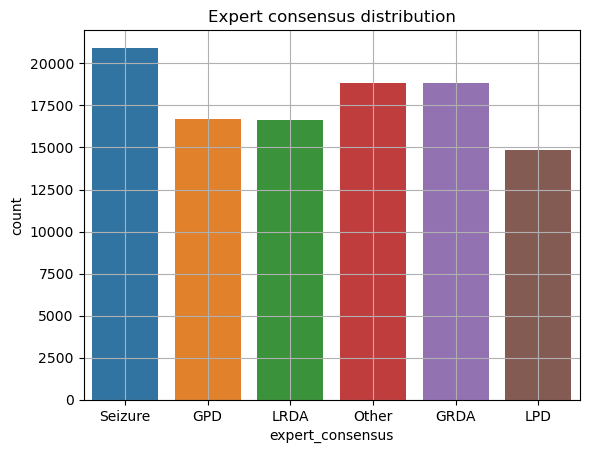

In [16]:
# Distribution of patterns is balanced
fig = plt.figure()
ax = sns.countplot(
    x="expert_consensus",
    data=df,
    dodge=False
)
ax.get_legend()
plt.title("Expert consensus distribution")
plt.grid()

In [17]:
df.nunique()

eeg_id                               17089
eeg_sub_id                             743
eeg_label_offset_seconds              1502
spectrogram_id                       11138
spectrogram_sub_id                    1022
spectrogram_label_offset_seconds      4686
label_id                            106800
patient_id                            1950
expert_consensus                         6
seizure_vote                            18
lpd_vote                                19
gpd_vote                                17
lrda_vote                               16
grda_vote                               16
other_vote                              26
dtype: int64

In [18]:
# A spectrogram with several eegs
print(df.groupby("spectrogram_id").eeg_id.nunique().sort_values(ascending=False))
print()
print("-" * 100)
print()
df[df.spectrogram_id == 764146759]

spectrogram_id
764146759     107
1863712617     62
1940415234     54
2060670605     54
1908433744     53
             ... 
785799870       1
785887017       1
786484660       1
786569108       1
2147388374      1
Name: eeg_id, Length: 11138, dtype: int64

--------------------------------------------------------------------------------



,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
38904,539866621,0,0.0,764146759,0,0.0,1115897925,30631,LPD,0,1,0,1,0,0
38905,1270973624,0,0.0,764146759,1,82.0,1345524852,30631,LPD,0,4,0,1,0,0
38906,1270973624,1,6.0,764146759,2,88.0,2464085157,30631,LPD,0,4,0,1,0,0
38907,1270973624,2,8.0,764146759,3,90.0,598535481,30631,LPD,0,4,0,1,0,0
38908,1270973624,3,12.0,764146759,4,94.0,3353171059,30631,LPD,0,4,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39921,2943834611,15,66.0,764146759,1017,17622.0,942313336,30631,LRDA,0,4,0,7,0,4
39922,2943834611,16,68.0,764146759,1018,17624.0,4028157645,30631,LRDA,0,4,0,7,0,4
39923,2943834611,17,70.0,764146759,1019,17626.0,2904817771,30631,LRDA,0,4,0,7,0,4
39924,2943834611,18,74.0,764146759,1020,17630.0,1142705888,30631,LRDA,0,4,0,7,0,4


### Recording Parameters

In [19]:
fs = 200  # data sampled at 200 Hz
window_length = 10  # 10 seconds central window
subsample_length = 50  # 50 seconds subsampling for each row

In [24]:
## Choose particular eeg_id and load eeg

eeg_path_template = "train_eegs/{eeg_id}.parquet"

In [25]:
# we chose this id as it is associated with a heavily recognized pattern 
eeg_id = 2900632927
df[df.eeg_id == eeg_id]

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
949,2900632927,0,0.0,13052565,0,0.0,3324808409,29441,LPD,1,13,0,0,0,0
950,2900632927,1,2.0,13052565,1,2.0,3118264048,29441,LPD,1,13,0,0,0,0
951,2900632927,2,4.0,13052565,2,4.0,805471401,29441,LPD,1,13,0,0,0,0
952,2900632927,3,8.0,13052565,3,8.0,3516258963,29441,LPD,1,13,0,0,0,0
953,2900632927,4,14.0,13052565,4,14.0,1483774357,29441,LPD,1,13,0,0,0,0


In [27]:
df_of_eeg = pd.read_parquet(eeg_path_template.format(eeg_id=eeg_id))
print("EEG record shape: ", df_of_eeg.shape)
df_of_eeg.head()

EEG record shape:  (12800, 20)


,Fp1,F3,C3,P3,F7,T3,T5,O1,Fz,Cz,Pz,Fp2,F4,C4,P4,F8,T4,T6,O2,EKG
0,8.040000,-0.32,-41.130001,10.86,-7.720000,-43.660000,-17.020000,-18.170000,61.450001,92.660004,47.849998,-10.31,2.30,31.340000,23.410000,-23.650000,-19.540001,-0.160000,11.58,-96.110001
1,19.260000,-15.70,-60.070000,-9.77,-22.559999,-65.510002,-32.270000,-37.840000,85.440002,76.419998,39.980000,0.68,-4.51,14.750000,6.300000,-41.580002,-34.259998,-21.530001,-3.44,-229.490005
2,-12.940000,-7.69,-48.529999,-10.42,-10.600000,-52.299999,-19.330000,-23.750000,-4.910000,38.759998,-20.299999,-18.76,-8.54,23.299999,15.770000,-31.150000,-24.059999,-8.610000,5.57,119.330002
3,2.090000,6.93,-35.490002,8.51,5.670000,-32.389999,-5.490000,-11.090000,31.600000,75.889999,21.900000,-14.53,2.34,34.680000,25.389999,-19.959999,-16.610001,3.010000,13.63,36.919998
4,30.620001,-3.72,-52.090000,-3.42,-7.510000,-51.299999,-21.129999,-30.709999,101.440002,87.459999,53.320000,4.38,0.48,17.680000,7.950000,-38.220001,-33.369999,-19.139999,-2.12,-261.760010


In [28]:
print(df_of_eeg.columns.to_list())

['Fp1', 'F3', 'C3', 'P3', 'F7', 'T3', 'T5', 'O1', 'Fz', 'Cz', 'Pz', 'Fp2', 'F4', 'C4', 'P4', 'F8', 'T4', 'T6', 'O2', 'EKG']


We have 20 signals, 19 of which correspond to EEG measurements, which are voltage fluctuations recorded by electrodes put on the scalp, and one that corresponds to EKG, which is the patient's ECG.

EEG measurements reveal the electrical activity of the brain. The various signal designations (Fp1, F3,...) relate to conventional places where electrodes will be placed. The sites are often connected with a certain region of the brain. The letters represent certain lobes, such as pre-frontal (Fp), frontal (F), temporal (T), parietal (P), occipital (O), and central (C). Even numbers in electrode names imply that they are located on the right side of the head. 
An odd number indicates that it is positioned on the left side. Z (for zero) indicates that the electrode is located in the middle plane and acts as a reference point.

In [29]:
# adding time

df_of_eeg["time"] = df_of_eeg.index / fs
df_of_eeg.set_index("time", inplace=True)
df_of_eeg.index

Index([   0.0,  0.005,   0.01,  0.015,   0.02,  0.025,   0.03,  0.035,   0.04,
        0.045,
       ...
        63.95, 63.955,  63.96, 63.965,  63.97, 63.975,  63.98, 63.985,  63.99,
       63.995],
      dtype='float64', name='time', length=12800)

Text(0.5, 1.0, 'Fp1')

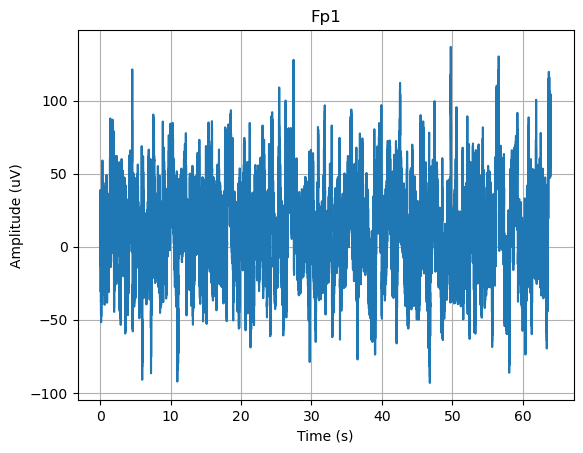

In [30]:
# Plot one electrode

plt.plot(df_of_eeg.index, df_of_eeg["Fp1"])
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (uV)")
plt.grid()
plt.title("Fp1")

Text(0, 0.5, 'Amplitude')

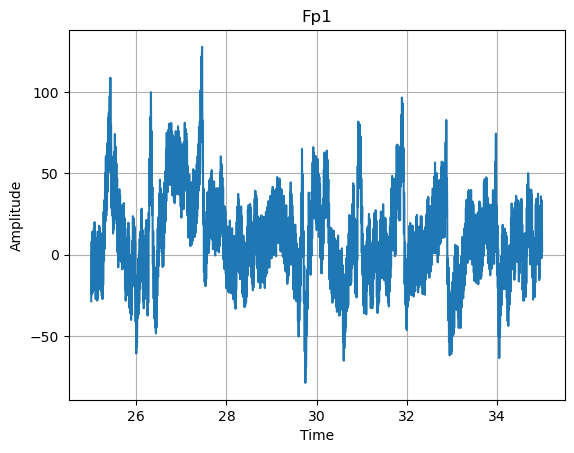

In [36]:
# focusing on one window/sample

x_start = 25.0
x_end = 35.0
plt.plot(df_of_eeg.loc[x_start:x_end].index, df_of_eeg.loc[x_start:x_end]["Fp1"])
plt.grid()
plt.title("Fp1")
plt.xlabel("Time")
plt.ylabel("Amplitude")

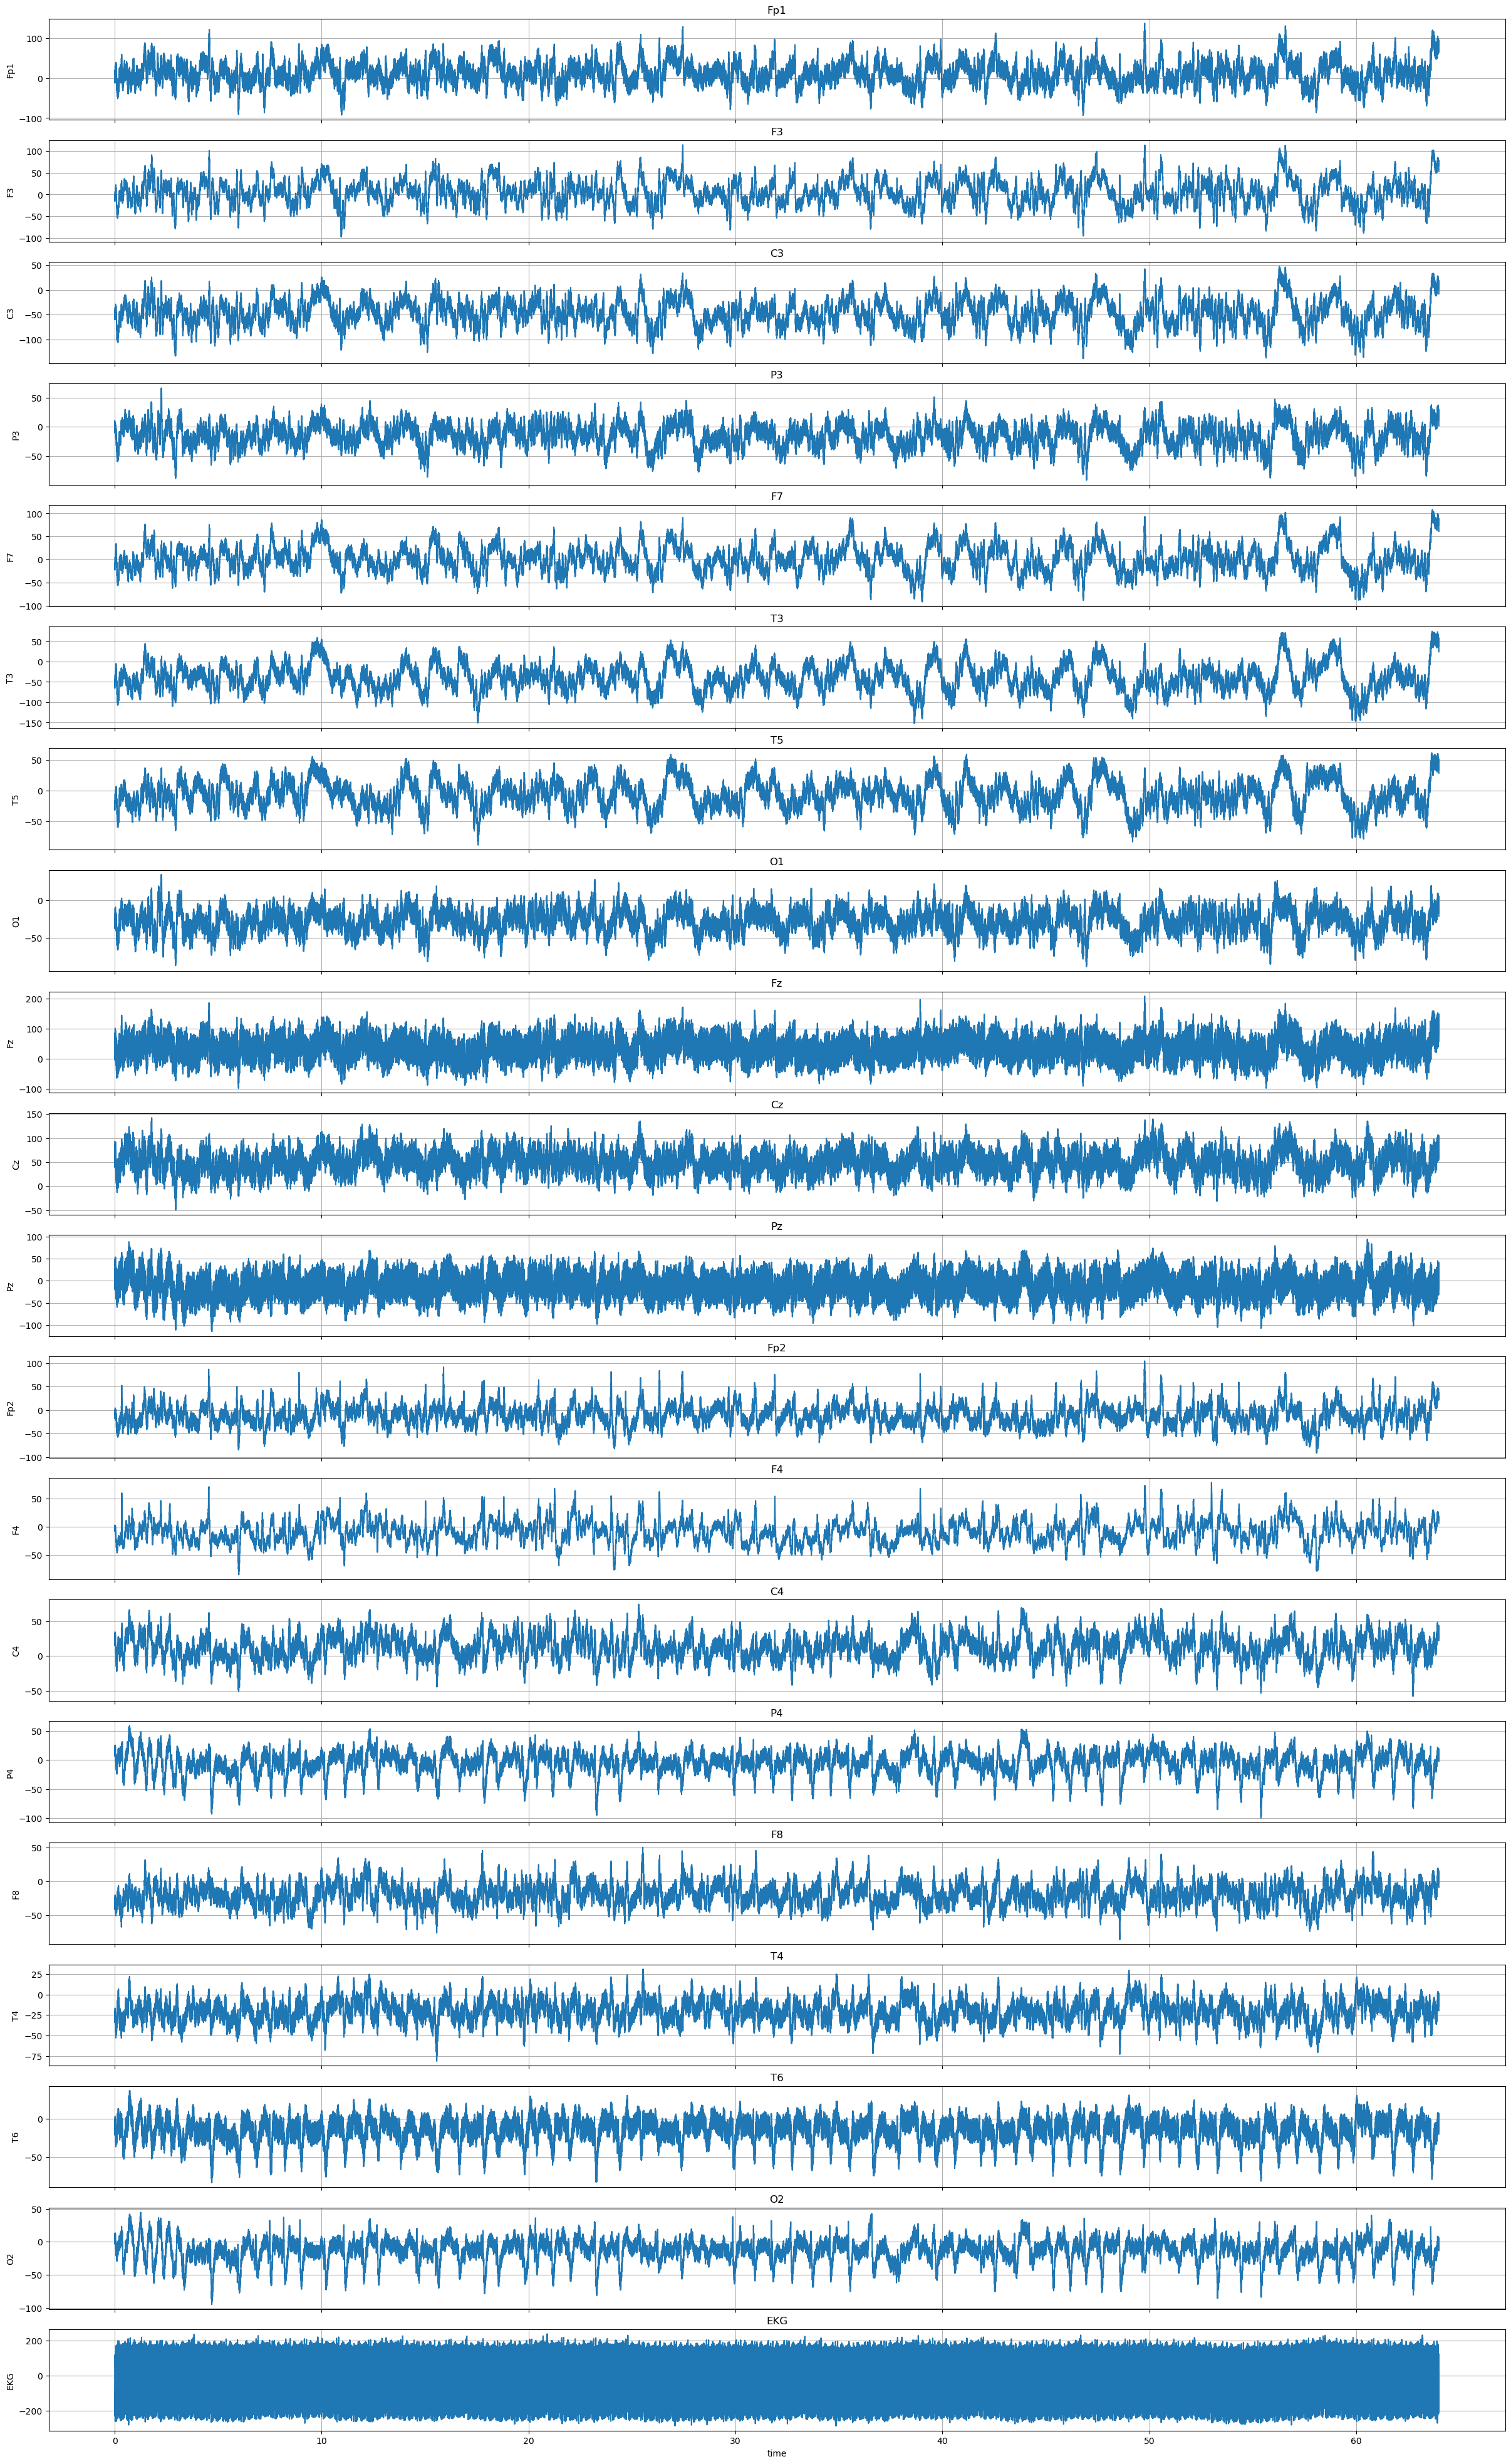

In [32]:
# plotting the whole set of electrodes

fig, axes = plt.subplots(nrows=len(df_of_eeg.columns), ncols=1, sharex=True, figsize=(30, 50))
for i, col_name in enumerate(df_of_eeg.columns):
    ax = sns.lineplot(data=df_of_eeg, x=df_of_eeg.index, y=col_name, ax=axes[i])
    ax.set_title(col_name)
    ax.grid()
plt.subplots_adjust()

Not very insightful, signals are very noisy.  A possible cause of the noise in our signal is the existence of an interfering signal that add to the true signal.

Things can be intepreted with the use of EKG or ECG records as with the more dense graph we can filter down different amplitudes. Further processing can be interpretable and meaningful one.

### Considering "seizure_vote" as the target variable to identify the seizures, let's continue to fit the models

In [34]:
from sklearn.model_selection import train_test_split

# selecting features and target variable
features = df[['eeg_label_offset_seconds', 'spectrogram_label_offset_seconds', 'lpd_vote', 'gpd_vote', 'lrda_vote', 'grda_vote', 'other_vote']]
target = df['seizure_vote']

# splitting the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(features, target, test_size=0.2, random_state=42)

X_train.head(), y_train.head()

(        eeg_label_offset_seconds  spectrogram_label_offset_seconds  lpd_vote  \
 5578                        50.0                              50.0         0   
 85859                        4.0                               4.0         0   
 103774                     134.0                             134.0         0   
 93477                        0.0                               0.0         0   
 36090                        0.0                               0.0         0   
 
         gpd_vote  lrda_vote  grda_vote  other_vote  
 5578           0          0          0           0  
 85859          0          0          0          17  
 103774         0          0          0           0  
 93477          0          0          0           0  
 36090          0          1          8           7  ,
 5578      3
 85859     0
 103774    3
 93477     3
 36090     0
 Name: seizure_vote, dtype: int64)

We split the data into training and validation sets and used 80% of the data for training and 20% for validation.

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# initializing models
linear_reg = LinearRegression()
tree_reg = DecisionTreeRegressor(random_state=42)
forest_reg = RandomForestRegressor(random_state=42)

# fitting train data
linear_reg.fit(X_train, y_train)
tree_reg.fit(X_train, y_train)
forest_reg.fit(X_train, y_train)

# predicting validation data
y_pred_linear = linear_reg.predict(X_val)
y_pred_tree = tree_reg.predict(X_val)
y_pred_forest = forest_reg.predict(X_val)

def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2

metrics_linear = evaluate_model(y_val, y_pred_linear)
metrics_tree = evaluate_model(y_val, y_pred_tree)
metrics_forest = evaluate_model(y_val, y_pred_forest)

metrics_linear, metrics_tree, metrics_forest

((1.095541481220582, 1.968797282015237, 1.403138368805884, 0.1641752673195811),
 (0.16508339612013773,
  0.5856042869228182,
  0.7652478597963004,
  0.7513900740086538),
 (0.18138760235755363,
  0.46737118335888705,
  0.6836455100115023,
  0.8015842474174801))

Calculated the Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), R-squared (R²) for error metrics, respectively for each model.

Linear Regression - The high error metrics and low R² value indicate that this model doesn't fit the data well. The assumption of a linear relationship might not hold true for this dataset.

Decision Tree Model - This model shows a significant improvement with lower error metrics and a higher R² value, suggesting it captures the data's structure better.

Random Forest Model - This model performs the best, with the lowest error metrics and the highest R² value. The ensemble approach of averaging multiple trees reduces overfitting and improves predictive performance.

### Based on the evaluation metrics, the Random Forest Regression model fits the data best. But feature engineering, hyperparameter tuning, and cross-validation would be evaluated for better improvement.